# Support Vector Machine (SVM)

Invented in [1963](https://en.wikipedia.org/wiki/Support_vector_machine#History) by [Vladimir N. Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.



References:

1. [Support Vector Machine in Javascript Demo by Karpathy](http://cs.stanford.edu/people/karpathy/svmjs/demo/)

2. [SVM](http://www.svms.org/tutorials/)

3. [Statsoft](http://www.statsoft.com/Textbook/Support-Vector-Machines)

4. [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

5. [Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html)


### Learning Outcomes:

* Introduction
* Linear SVM Classification
* Polynomial Kernal
* Radial Basis Function /  Gaussian Kernel
* Support Vector Regression

***

# 1. Introduction

Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes. 

We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.

<img src="img\SVM 2.png" height=50% width=50%>

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates. 

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ [Wikipedia](https://en.wikipedia.org/wiki/Hyperplane)

<img src="img\SVM 3.png" height=50% width=50%>

In SVM, the **separating line**, the solid brown line, is the line that allows for largest margin between the two classes. 

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called **support vectors**, circled in red. 

<img src="img\SVM 4.png" height=50% width=50%>

***
# 2. Linear SVM Classification


* Support Vectors

* Separate with a straight line (linearly separable)

* Margin

  * Hard margin classification
      * Strictly based on those that are at the margin between the two classes
      * However, this is sensitive to outliers
      
  * Soft margin classification
      * Widen the margin and allows for violation
      * With Python Scikit-Learn, you control the width of the margin
      * Control with `C` hyperparameter
        * smaller `C` leads to a wider street but more margin violations
        * High `C` - fewer margin violations but ends up with a smaller margin



**Note:**

* SVM are sensitive to feature scaling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
target = iris.target

In [6]:
df['species']=iris.target

In [7]:
# map function to change target numeric value to its original values
'''
num_to_species = {0:'setosa',1:'versicolor',2:'virginica'}
df['species'] = df['species'].map(num_to_species)
'''

"\nnum_to_species = {0:'setosa',1:'versicolor',2:'virginica'}\ndf['species'] = df['species'].map(num_to_species)\n"

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df[['petal length (cm)','petal width (cm)']]
y=df['species']

In [10]:
from sklearn.svm import SVC
C = 1.0
clf = SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.predict([[6,2]])

array([2])

In [12]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min,x_max = Xv.min(),Xv.max() +1
y_min,y_max = y.min(),y.max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

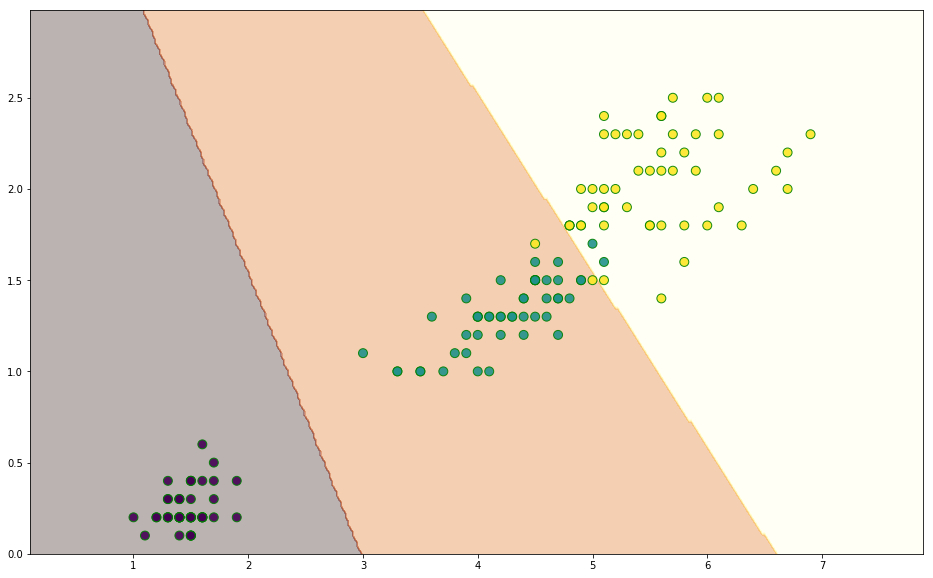

In [13]:
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g')


## LINEAR SVM Implementation

In [14]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=50)

### Scale Features

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [17]:
c=0.1
clf = SVC(kernel='linear',C=c)
clf.fit(X_std_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [19]:
res = cross_val_score(clf,X_std_train,y_train,cv=10,scoring='accuracy')
print("Average Acccuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t {0:.4f}".format(np.std(res)))

Average Acccuracy: 	 0.9482
Average SD: 	 0.0824


In [20]:
y_train_pred = cross_val_predict(clf,X_std_train,y_train,cv=3)

In [21]:
confusion_matrix(y_train,y_train_pred)

array([[41,  0,  0],
       [ 0, 37,  1],
       [ 0,  4, 37]], dtype=int64)

In [22]:
print('Precision Score \t {0:.4f}'.format(precision_score(y_train,y_train_pred,
                                                          average='weighted')))
print('Recall Score \t {0:.4f}'.format(recall_score(y_train,y_train_pred,
                                                       average='weighted')))
print('F1 Score \t {0:.4f}'.format(f1_score(y_train,y_train_pred,
                                                          average='weighted')))


Precision Score 	 0.9601
Recall Score 	 0.9583
F1 Score 	 0.9583


### Cross Validation within Test Dataset

In [23]:
y_test_pred = cross_val_predict(clf,sc_x.transform(X_test),y_test,cv=3)

In [24]:
confusion_matrix(y_test,y_test_pred)

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  3,  6]], dtype=int64)

In [25]:
print('Precision Score \t {0:.4f}'.format(precision_score(y_test,y_test_pred,
                                                          average='weighted')))
print('Recall Score \t {0:.4f}'.format(recall_score(y_test,y_test_pred,
                                                       average='weighted')))
print('F1 Score \t {0:.4f}'.format(f1_score(y_test,y_test_pred,
                                                          average='weighted')))


Precision Score 	 0.9200
Recall Score 	 0.9000
F1 Score 	 0.8956


***
# 3. Polynomial Kernel

<img src='img\polynomial.png'>

In [26]:
c = 1.0
clf = SVC(kernel='poly',C=c,degree=3)
clf.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
xv = X.values.reshape(-1,1)
h = 0.02
x_min,x_max = xv.min(),xv.max()+1
y_min,y_max =y.min(),y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))


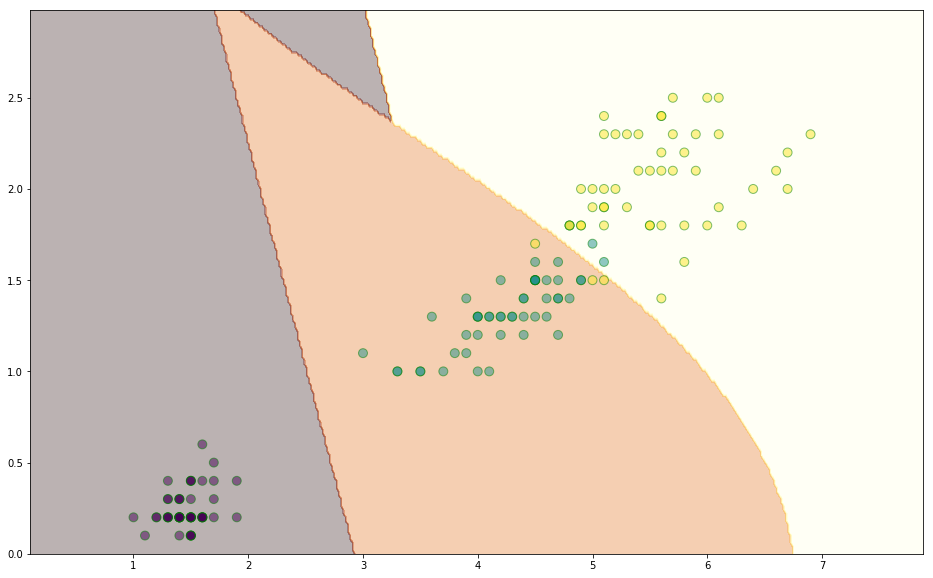

In [28]:
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax= plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.5,edgecolors = 'g')

## Polynomial SVM Implementation

In [29]:
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [40]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [49]:
C = 1.0
clf = SVC(kernel='poly', degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [50]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.7985
Accuracy SD: 		 0.1327


In [51]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [52]:
confusion_matrix(y_train, y_train_pred)

array([[36,  2,  1],
       [ 0, 25, 12],
       [ 0, 16, 28]], dtype=int64)

In [53]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.7547
Recall Score: 		 0.7417
F1 Score: 		 0.7463


#### Cross Validation within Test Dataset

In [54]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [55]:
confusion_matrix(y_test, y_test_pred)

array([[ 0, 11,  0],
       [ 0, 13,  0],
       [ 0,  6,  0]], dtype=int64)

In [56]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.1878
Recall Score: 		 0.4333
F1 Score: 		 0.2620


C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


***
# 4. Gaussian Radial Basis Function (rbf)

The kernel function can be any of the following:

* linear: $\langle x, x'\rangle$.


* polynomial: $(\gamma \langle x, x'\rangle + r)^d$. 

  $d$ is specified by keyword `degree`
  
  $r$ by `coef0`.


* rbf: $\exp(-\gamma \|x-x'\|^2)$. 

  $\gamma$ is specified by keyword `gamma` must be greater than 0.


* sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$

  where $r$ is specified by `coef0`.
  
[scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

In [57]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

C:\Users\winuser\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [132]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [60]:
C = 1.0
clf = SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [61]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [62]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [63]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [64]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


### Grid Search

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
from sklearn.model_selection import GridSearchCV

In [144]:
pipeline = Pipeline([('clf',SVC(kernel='rbf',C=1,gamma=0.1))])

In [145]:
params = {'clf__C':(0.1,0.5,1,2,5,10,20),
         'clf__gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}

In [146]:
svm_grid_rbf = GridSearchCV(pipeline,params,n_jobs=-1,
                           cv=3,verbose=1,scoring='accuracy')

In [147]:
svm_grid_rbf.fit(X_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    2.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [148]:
svm_grid_rbf.best_score_

0.975

In [149]:
best = svm_grid_rbf.best_estimator_.get_params()

In [150]:
for k in sorted(params.keys()):
    print('\t{0}: \t {1:.2f}'.format(k,best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.50


Conductng validation in the test dataset

In [151]:

y_test_pred = svm_grid_rbf.predict(X_test)

In [152]:
confusion_matrix(y_test,y_test_pred)

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

In [153]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9700
Recall Score: 		 0.9667
F1 Score: 		 0.9668


***
# 5. Support Vector Regression

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [158]:
y = boston_data.target
X = df[['LSTAT']].values

In [159]:
svr = SVR()
svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [160]:
sort_idx = X.flatten().argsort()

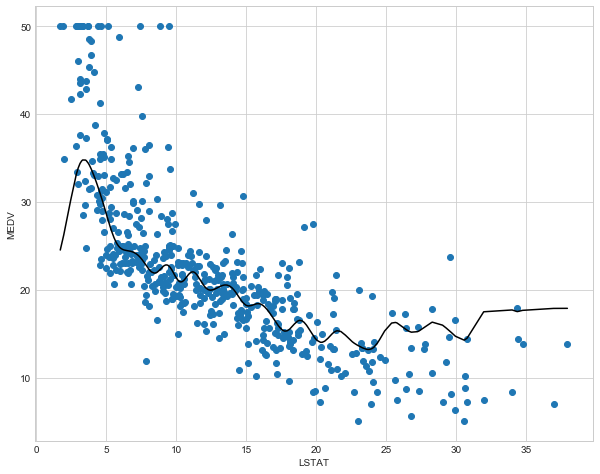

In [161]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Linear Kernel

In [163]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [164]:
y_train_pred = svr.predict(X_train)

In [165]:
y_test_pred = svr.predict(X_test)

In [166]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test: 36.8372


In [167]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test: 0.5056


Polynomial

In [168]:
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [169]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [170]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 110.3334, test: 114.3676
R^2 train: -0.2553, test: -0.5349


rbf Kernel

In [171]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [172]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [173]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


***
# 6. Advantages and Disadvantages



The **advantages** of support vector machines are:
* Effective in high dimensional spaces.
* Uses only a subset of training points (support vectors) in the decision function.
* Many different Kernel functions can be specified for the decision function.
    * Linear
    * Polynomial
    * RBF
    * Sigmoid
    * Custom


The **disadvantages** of support vector machines include:
* Beware of overfitting when num_features > num_samples.
* Choice of Kernal and Regularization can have a large impact on performance
* No probability estimates


***

# Summary


| Class |  Out-of-core support | Kernel Trick |
| :- |  :- | :- | :- |
| `SGDClassifier` |  Yes | No |
| `LinearSVC` |  No | No |
| `SVC` |  No | Yes |

**Note:** All require features scaling

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization. ~ [scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

# Where to Go From Here

* [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/)
* [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/)
* [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/ch05.html#svm_chapter)
* [Python Data Science Handbook](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/ch05.html#in-depth-support-vector-machines)
* [Python Machine Learning, 2E](https://www.safaribooksonline.com/library/view/python-machine-learning/9781787125933/ch03s04.html)
* [Statistics for Machine Learning](https://www.safaribooksonline.com/library/view/statistics-for-machine/9781788295758/f2c95085-6676-41c6-876e-ab6802666ea2.xhtml)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/)
